In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv')


In [3]:
#connecting to sql and cursor object

con = sqlite3.connect('../zippedData/im.db')
cursor_obj = con.cursor()

In [4]:
#Query for all persons who worked on English language movies

imdb_persons = pd.read_sql("""

SELECT mb.movie_id, mb.runtime_minutes as runtime, mb.genres, mr.averagerating, mr.numvotes, mb.primary_title as movie_title, pr.person_id, pr.ordering, pr.category, p.primary_name, p.primary_profession

FROM 
    principals as pr

    INNER JOIN
    persons as p
    ON pr.person_id = p.person_id
    
    INNER JOIN
    movie_akas as ma
    ON ma.movie_id = pr.movie_id
    
    INNER JOIN
    movie_basics as mb
    ON mb.movie_id = pr.movie_id
    
    INNER JOIN
    movie_ratings as mr
    ON mr.movie_id = mb.movie_id
    
WHERE
    ma.language IS 'en'

    
""", con)

In [5]:
imdb_persons

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...
176689,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm0624375,6,producer,Hiroyuki Negishi,"animation_department,producer"
176690,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm4151154,7,producer,Mariko Seto,"producer,miscellaneous"
176691,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm3566386,8,cinematographer,Hidetoshi Shinomiya,"cinematographer,camera_department,assistant_di..."
176692,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm1395952,9,actress,Marika Matsumoto,"actress,soundtrack"


In [6]:
imdb_1000_votes = imdb_persons[imdb_persons['numvotes'] > 1000]

In [134]:
imdb_1000_votes

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...
176546,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9822497,6,writer,Seung-hee Yoo,writer
176547,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm0359923,7,producer,Daniel Hank,"production_manager,producer,miscellaneous"
176548,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9418760,8,producer,Ha-Young Lee,producer
176549,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9454922,9,actress,Cynthia Bell,None


In [8]:
imdb_1000_votes_actors = imdb_1000_votes[(imdb_1000_votes['category'] == 'actor') | (imdb_1000_votes['category'] == 'actress') ]

In [9]:
#imdb_1000_votes_actors actors/actress for movies with at least 1,000 IMDB votes

In [10]:
imdb_1000_votes_actors_split = imdb_1000_votes_actors

In [11]:
imdb_1000_votes_actors_split['genres'] = imdb_1000_votes_actors['genres'].str.split(',')



<ipython-input-11-d1c240fb375e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_1000_votes_actors_split['genres'] = imdb_1000_votes_actors['genres'].str.split(',')


In [12]:
imdb_1000_votes_actors_split_exploded = imdb_1000_votes_actors_split.explode('genres')


In [13]:
#imdb_1000_votes_actors_split_exploded

In [14]:
imdb_1000_votes_actor_top3 = imdb_1000_votes_actors_split_exploded[(imdb_1000_votes_actors_split_exploded['genres'] == 'Action') | (imdb_1000_votes_actors_split_exploded['genres'] == 'Animation') | (imdb_1000_votes_actors_split_exploded['genres'] == 'Adventure')]

In [15]:
imdb_1000_votes_actor_top3['genres'].value_counts()

Action       5762
Adventure    3300
Animation    1677
Name: genres, dtype: int64

In [18]:
#DataFrame of Adventure, Action and Animation split up, showing each actor/actress
imdb_1000_votes_actor_top3

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
10,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...
176191,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm3092471,4,actor,Marwan Kenzari,actor
176198,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer"
176199,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack"
176200,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack"


In [19]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [20]:
df_tn['datetime'] = df_tn['release_date']

In [21]:
df_tn['datetime'] = pd.to_datetime(df_tn['datetime'])

In [22]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,datetime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018-12-31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999-04-02
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005-07-13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015-09-29


In [23]:
df_tn_2010 = df_tn[df_tn['datetime'] > '2010-01-01']

In [ ]:
imdb_1000_votes_actor_no_dups = imdb_1000_votes_actor_top3.drop_duplicates()

In [26]:
#tn moive budgets for all movies after 2010 (matching the timeline of the IMBD dataset
imdb_1000_votes_actor_no_dups

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
50,tt1272051,85.0,Adventure,5.2,1102,Space Dogs,nm1370204,1,actress,Anna Bolshova,actress
...,...,...,...,...,...,...,...,...,...,...,...
175970,tt4914580,140.0,Action,7.1,6514,The Age of Shadows,nm0258268,4,actor,Richard Epcar,"actor,miscellaneous,writer"
176178,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer"
176179,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack"
176180,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack"


In [28]:
#Imdb_merged has IMDB for actors in top 3 genres merged with Budget/Gross/Profit
Imdb_merged = imdb_1000_votes_actor_no_dups.merge(df_tn_2010, how = "inner", left_on = 'movie_title', right_on = 'movie')

KeyError: 'movie'

In [34]:
Imdb_merged

283

In [40]:
#strip unwanted characters from budget and gross columns
Imdb_merged['production_budget'] = Imdb_merged['production_budget'].apply(lambda x: x.strip('$')) 
Imdb_merged['domestic_gross'] = Imdb_merged['domestic_gross'].apply(lambda x: x.strip('$')) 
Imdb_merged['worldwide_gross'] = Imdb_merged['worldwide_gross'].apply(lambda x: x.strip('$')) 

In [41]:
Imdb_merged['production_budget'] = Imdb_merged['production_budget'].apply(lambda x: int(x.replace(',','')))
Imdb_merged['domestic_gross'] = Imdb_merged['domestic_gross'].apply(lambda x: int(x.replace(',','')))
Imdb_merged['worldwide_gross'] = Imdb_merged['worldwide_gross'].apply(lambda x: int(x.replace(',','')))

In [42]:
Imdb_merged_no_dups = Imdb_merged.drop_duplicates()

In [44]:
Imdb_merged_no_dups['profit'] = Imdb_merged_no_dups['worldwide_gross'] - Imdb_merged_no_dups['production_budget']

In [127]:
Imdb_merged_no_dups

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,datetime,profit,count_number_of_movies
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
4,tt1308729,92.0,Action,5.7,44816,Bullet to the Head,nm0000230,1,actor,Sylvester Stallone,"actor,writer,producer",42,"Feb 1, 2013",Bullet to the Head,55000000,9489829,22597969,2013-02-01,-32402031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,tt5314190,84.0,Animation,6.9,1225,Sgt. Stubby: An American Hero,nm7793337,4,actor,Jordan Beck,"actor,animation_department,camera_department",6,"Apr 13, 2018",Sgt. Stubby: An American Hero,25000000,3054285,3645957,2018-04-13,-21354043,1
1723,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1
1724,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1
1725,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1


In [105]:
actor_median_profit = Imdb_merged_no_dups.groupby(
    ['genres', 'primary_name']).median().sort_values(by = ['genres','profit'], ascending = False)

In [128]:
Imdb_merged_no_dups['count_number_of_movies'] = 1

In [129]:
actors_by_movie_count = Imdb_merged_no_dups.groupby(['genres', 'primary_name']).sum().sort_values(by = 'count_number_of_movies', ascending = False)

In [131]:
actors_by_movie_count.head(40)

runtime  averagerating  numvotes  ordering   id  \
genres    primary_name                                                          
Action    Jason Statham         909.0           51.4   1349473        14  518   
          Dwayne Johnson        958.0           52.4   1498182        14  358   
Adventure Robert Downey Jr.     967.0           53.4   4880468        10  217   
Action    Robert Downey Jr.     967.0           53.4   4880468        10  217   
          Chris Hemsworth       904.0           50.3   3352868        12  312   
          Liam Hemsworth        771.0           39.7   2435044        15  291   
Adventure Liam Hemsworth        771.0           39.7   2435044        15  291   
          Chris Hemsworth       774.0           43.7   3302713        11  248   
Action    Jennifer Lawrence     792.0           41.6   2635497        10  222   
          Vin Diesel            750.0           40.9   2015931         7  252   
Adventure Jennifer Lawrence     792.0           41.6   2635497        10  222   
Action    Chris Evans           706.0           38.8   3342946        10   82   
Adventure Cate Blanchett        658.0           36.1   1461345        15  208   
Action    Liam Neeson           579.0           33.5    830670         7  113   
          Nicolas Cage          519.0           25.8    330354         5  346   
Adventure Josh Hutcherson       650.0           34.6   2097434        10  254   
Action    Russell Crowe         661.0           31.9   1030697         8  213   
          Josh Brolin           602.0           37.0   1171294        10  284   
          Tom Cruise            577.0           33.9   1286059         5  262   
          Jon Bernthal          586.0           35.5   1081831        16  337   
Adventure James McAvoy          473.0           28.8   1298899         7  114   
Action    Cate Blanchett        514.0           28.7   1022724        11  186   
Adventure Martin Freeman        562.0           29.8   1765771         9   96   
Action    Tom Hardy             485.0           29.3   2297193        10  181   
Adventure Anne Hathaway         486.0           28.2   1929719        12  155   
Action    Michael Fassbender    434.0           25.9    786147         8  174   
          Josh Hutcherson       548.0           27.9   2002116         8  177   
          Mark Wahlberg         514.0           26.7    604702         4  238   
Adventure Ian McKellen          606.0           31.1   2343892         6  117   
          Russell Crowe         528.0           24.5    862631         7  164   
Action    Bruce Willis          427.0           20.1    372804         6  161   
Adventure Chris Evans           580.0           31.7   3103682         9   55   
          Ryan Reynolds         438.0           28.2   1514315         5  225   
Action    Anthony Hopkins       468.0           25.1   1074724        12  162   
Adventure Will Smith            457.0           25.0   1082154         6  269   
Action    Tom Hiddleston        475.0           28.4   1944975        10  296   
          Christoph Waltz       499.0           26.4    739487        11  151   
          Sylvester Stallone    424.0           24.9    786729         4  253   
Adventure Johnny Depp           486.0           25.9   1114980         6  104   
          Tom Hiddleston        475.0           28.4   1944975        10  296   

                              production_budget  domestic_gross  \
genres    primary_name                                            
Action    Jason Statham               878000000       903943853   
          Dwayne Johnson              880850000      1236888335   
Adventure Robert Downey Jr.          1650600000      3224811989   
Action    Robert Downey Jr.          1650600000      3224811989   
          Chris Hemsworth            1315600000      2041228871   
          Liam Hemsworth              760000000      1639711004   
Adventure Liam Hemsworth              760000000      1639711004   
          Chris Hemswort

In [97]:
actors_over_3_movies = actors_by_movie_count[actors_by_movie_count['count_number_of_movies'] > 3]

In [98]:
actors_over_3_movies = actors_over_3_movies.reset_index()

In [202]:
#list of actors who've done over 3 movies in a particular genre
actors_over_3_movies['mean_profit'] = actors_over_3_movies['profit']/actors_over_3_movies['count_number_of_movies']
actors_over_3_movies['mean_production_budget'] = actors_over_3_movies['production_budget']/actors_over_3_movies['count_number_of_movies']
actors_over_3_movies['mean_averagerating'] = actors_over_3_movies['averagerating']/actors_over_3_movies['count_number_of_movies']



In [203]:
actors_over_3_movies.sort_values(by = 'mean_profit' , ascending = False)

,genres,primary_name,runtime,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,profit,count_number_of_movies,mean_profit,mean_production_budget,mean_averagerating
31,Adventure,Chris Evans,580.0,31.7,3103682,9,55,1105600000,2169185246,6109153473,5003553473,4,1.250888e+09,2.764000e+08,7.925000
2,Adventure,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
3,Action,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
11,Action,Chris Evans,706.0,38.8,3342946,10,82,1145600000,2173748275,6197223353,5051623353,5,1.010325e+09,2.291200e+08,7.760000
7,Adventure,Chris Hemsworth,774.0,43.7,3302713,11,248,1280600000,1995409158,5793079067,4512479067,6,7.520798e+08,2.134333e+08,7.283333
28,Adventure,Ian McKellen,606.0,31.1,2343892,6,117,950000000,1050411745,3670810819,2720810819,4,6.802027e+08,2.375000e+08,7.775000
4,Action,Chris Hemsworth,904.0,50.3,3352868,12,312,1315600000,2041228871,5864197445,4548597445,7,6.497996e+08,1.879429e+08,7.185714
9,Action,Vin Diesel,750.0,40.9,2015931,7,252,858000000,1208898770,4594397148,3736397148,6,6.227329e+08,1.430000e+08,6.816667
26,Action,Josh Hutcherson,548.0,27.9,2002116,8,177,495000000,1451538526,2958353344,2463353344,4,6.158383e+08,1.237500e+08,6.975000
22,Adventure,Martin Freeman,562.0,29.8,1765771,9,96,805000000,847541337,3059091649,2254091649,4,5.635229e+08,2.012500e+08,7.450000


In [179]:
action_actors_over_3 = actors_over_3_movies[actors_over_3_movies['genres'] == 'Action']

In [180]:
action_actors_top_10 = action_actors_over_3[action_actors_over_3['mean_profit'] > 3.737017e+08]

In [181]:
action_actors

Int64Index([3, 11, 4, 9, 26, 23, 5, 35, 1, 8], dtype='int64')

# Plot showing for Action movies, actor/actress with at least 4 movies, top 10 in mean profit for those movies

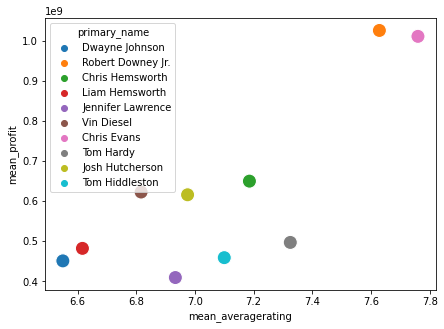

In [192]:
#action_actors_over_3

fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = 'mean_averagerating', y = 'mean_profit',hue = 'primary_name' ,
                 s = 200,  data = action_actors_top_10)
plt.show()

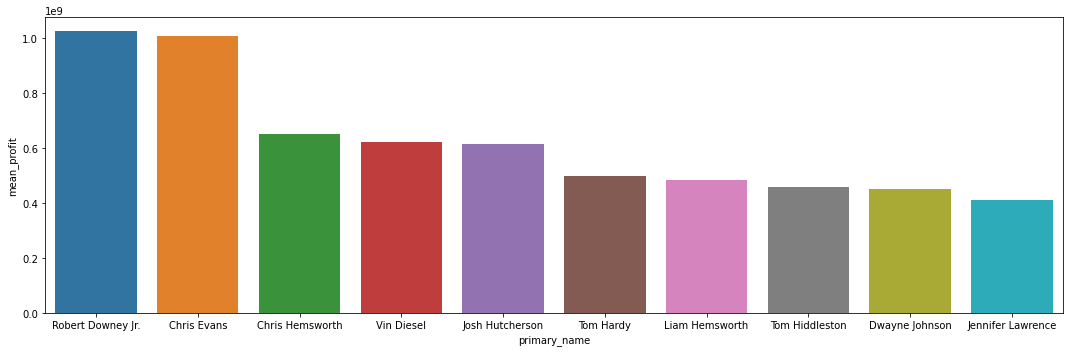

In [201]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x = 'primary_name', y = 'mean_profit', 
            data = action_actors_top_10.sort_values(by = 'mean_profit' , ascending = False))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")

plt.tight_layout()

plt.show()

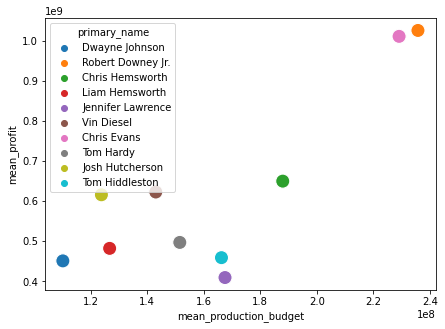

In [185]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = 'mean_production_budget', y = 'mean_profit',hue = 'primary_name' ,
                 s = 200,  data = action_actors_top_10)
plt.show()

In [150]:
action_actors_over_3.shape

(26, 13)

In [ ]:
style = 'species',hue = 'sex',

In [107]:
actor_list = actors_over_3_movies['primary_name'].unique()

In [108]:
actor_list

array(['Jason Statham', 'Dwayne Johnson', 'Robert Downey Jr.',
       'Chris Hemsworth', 'Liam Hemsworth', 'Jennifer Lawrence',
       'Vin Diesel', 'Chris Evans', 'Cate Blanchett', 'Liam Neeson',
       'Nicolas Cage', 'Josh Hutcherson', 'Russell Crowe', 'Josh Brolin',
       'Tom Cruise', 'Jon Bernthal', 'James McAvoy', 'Martin Freeman',
       'Tom Hardy', 'Anne Hathaway', 'Michael Fassbender',
       'Mark Wahlberg', 'Ian McKellen', 'Bruce Willis', 'Ryan Reynolds',
       'Anthony Hopkins', 'Will Smith', 'Tom Hiddleston',
       'Christoph Waltz', 'Sylvester Stallone', 'Johnny Depp',
       'Helena Bonham Carter', 'Hugh Jackman'], dtype=object)

In [110]:
actor_median_profit

runtime  averagerating  numvotes  ordering    id  \
genres    primary_name                                                         
Animation Idina Menzel        102.0           7.50  516998.0       2.0  56.0   
          Jonathan Groff      102.0           7.50  516998.0       3.0  56.0   
          Kristen Bell        102.0           7.50  516998.0       1.0  56.0   
          Craig T. Nelson     118.0           7.70  203510.0       1.0  44.0   
          Holly Hunter        118.0           7.70  203510.0       2.0  44.0   
...                             ...            ...       ...       ...   ...   
Action    Dániel Mogács       110.0           4.30    3119.0       4.0  79.0   
          Fernanda Dorogi     110.0           4.30    3119.0       2.0  79.0   
          Kriszta Dorogi      110.0           4.30    3119.0       3.0  79.0   
          Richard Philipps    110.0           4.30    3119.0       1.0  79.0   
          Nicholas Hoult      106.0           5.85   18869.5       2.5   8.0   

                            production_budget  domestic_gross  \
genres    primary_name                                          
Animation Idina Menzel            150000000.0     400738009.0   
          Jonathan Groff          150000000.0     400738009.0   
          Kristen Bell            150000000.0     400738009.0   
          Craig T. Nelson         200000000.0     608581744.0   
          Holly Hunter            200000000.0     608581744.0   
...                                       ...             ...   
Action    Dániel Mogács            90000000.0        195459.0   
          Fernanda Dorogi          90000000.0        195459.0   
          Kriszta Dorogi           90000000.0        195459.0   
          Richard Philipps         90000000.0        195459.0   
          Nicholas Hoult          189600000.0      22521177.0   

                            worldwide_gross        profit  \
genres    primary_name                                      
Animation Idina Menzel         1.272470e+09  1.122470e+09   
          Jonathan Groff       1.272470e+09  1.122470e+09   
          Kristen Bell         1.272470e+09  1.122470e+09   
          Craig T. Nelson      1.242521e+09  1.042521e+09   
          Holly Hunter         1.242521e+09  1.042521e+09   
...                                     ...           ...   
Action    Dániel Mogács        2.046602e+07 -6.953398e+07   
          Fernanda Dorogi      2.046602e+07 -6.953398e+07   
          Kriszta Dorogi       2.046602e+07 -6.953398e+07   
          Richard Philipps     2.046602e+07 -6.953398e+07   
          Nicholas Hoult       7.761452e+07 -1.119855e+08   

                            count_number_of_movies  
genres    primary_name                              
Animation Idina Menzel                         1.0  
          Jonathan Groff                       1.0  
          Kristen Bell                         1.0  
          Craig T. Nelson                      1.0  
          Holly Hunter                         1.0  
...                                            ...  
Action    Dániel Mogács                        1.0  
          Fernanda Dorogi                      1.0  
          Kriszta Dorogi                       1.0  
          Richard Philipps                     1.0  
          Nicholas Hoult                       1.0  

[1280 rows x 10 columns]

In [114]:
filter_actors = Imdb_merged_no_dups[Imdb_merged_no_dups['primary_name'].isin(actor_list)]

In [121]:
filter_actors.groupby(['genres', 'primary_name']).median().sort_values(by = ['profit', 'genres'], ascending = False)

,,runtime,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,profit,count_number_of_movies
genres,primary_name,,,,,,,,,,
Adventure,Chris Evans,145.0,7.95,668260.0,2.0,12.0,275000000.0,541142707.5,1.460475e+09,1.182675e+09,1.0
Action,Chris Evans,143.0,7.80,665594.0,2.0,17.0,250000000.0,459005868.0,1.403014e+09,1.072414e+09,1.0
Adventure,Robert Downey Jr.,141.0,7.50,665594.0,1.0,17.0,225000000.0,408992272.0,1.215392e+09,1.015392e+09,1.0
Action,Robert Downey Jr.,141.0,7.50,665594.0,1.0,17.0,225000000.0,408992272.0,1.215392e+09,1.015392e+09,1.0
Adventure,Mark Wahlberg,165.0,5.70,283486.0,1.0,37.0,210000000.0,245439076.0,1.104039e+09,8.940391e+08,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Action,Nicolas Cage,96.0,5.40,85777.0,1.0,73.0,40000000.0,10721033.0,4.104258e+07,-8.957417e+06,1.0
Animation,Helena Bonham Carter,84.0,6.90,1225.0,2.0,6.0,25000000.0,3054285.0,3.645957e+06,-2.135404e+07,1.0
Adventure,Liam Neeson,161.0,7.20,85242.0,3.0,42.0,46500000.0,7100177.0,2.372663e+07,-2.277337e+07,1.0


In [123]:
filter_actors.groupby(['genres', 'primary_name']).median().sort_values(by = ['genres', 'profit'], ascending = False).head(40)

runtime  averagerating  numvotes  ordering  \
genres    primary_name                                                       
Animation Dwayne Johnson          107.0           7.60  224253.0       2.0   
          Anne Hathaway            96.0           6.90  191621.0       2.0   
          Cate Blanchett          104.0           7.60   60769.0       4.0   
          Josh Hutcherson         102.0           6.70   95318.0       2.0   
          Martin Freeman           88.0           6.70   41958.0       4.0   
          James McAvoy             97.0           7.10   45439.0       1.0   
          Helena Bonham Carter     84.0           6.90    1225.0       2.0   
Adventure Chris Evans             145.0           7.95  668260.0       2.0   
          Robert Downey Jr.       141.0           7.50  665594.0       1.0   
          Mark Wahlberg           165.0           5.70  283486.0       1.0   
          Ian McKellen            152.5           7.85  592821.0       1.5   
          Martin Freeman          152.5           7.60  502092.0       2.0   
          Josh Hutcherson         137.0           6.70  379050.0       2.0   
          Johnny Depp             121.0           6.55  293702.5       1.5   
          Chris Hemsworth         128.5           7.15  603295.0       1.5   
          Jennifer Lawrence       134.0           6.90  477252.5       1.0   
          Liam Hemsworth          130.0           6.60  328317.0       3.0   
          Anne Hathaway           110.5           6.70  275217.0       3.0   
          Josh Brolin             110.0           7.60  309879.0       3.0   
          Will Smith              114.5           6.40  245783.0       1.0   
          Tom Hiddleston          116.5           6.95  511995.5       2.5   
          Hugh Jackman            129.0           7.35  510682.5       2.0   
          Ryan Reynolds           111.5           7.30  292195.0       1.0   
          Cate Blanchett          140.0           7.40  239480.0       3.0   
          Dwayne Johnson          110.0           6.10  192750.0       1.0   
          Anthony Hopkins         126.5           6.40  456295.0       2.5   
          Vin Diesel              119.0           6.40  144821.0       1.0   
          Christoph Waltz         122.0           6.80  150154.0       2.0   
          Sylvester Stallone      103.0           6.50  277584.0       1.0   
          Tom Cruise              109.5           5.90  162092.5       1.0   
          Russell Crowe           139.0           6.20  234403.0       1.0   
          Jason Statham           114.5           6.30  232164.5       2.0   
          James McAvoy            122.0           7.40  327184.5       1.0   
          Nicolas Cage             95.0           5.40   85777.0       1.0   
          Helena Bonham Carter    106.5           6.70   47661.5       2.5   
          Michael Fassbender      113.0           6.40   74085.0       2.0   
          Liam Neeson             161.0           7.20   85242.0       3.0   
          Bruce Willis            120.0           3.30    2536.0       2.0   
Action    Chris Evans             143.0           7.80  665594.0       2.0   
          Robert Downey Jr.       141.0           7.50  665594.0       1.0   

                                  id  production_budget  domestic_gross  \
genres    primary_name                                                    
Animation Dwayne Johnson        62.0        150000000.0     248757044.0   
          Anne Hathaway         46.0         90000000.0     143619809.0   
          Cate Blanchett        56.0        129000000.0     160791800.0   
          Josh Hutcherson       77.0        100000000.0     107518682.0   
          Martin Freeman        34.0         55000000.0      31051126.0   
          James McAvoy          14.0         85000000.0      46462469.0   
          Helena Bonham Carter   6.0         25000000.0       3054285.0   
Adventure Chris Evans           12.0        275000000.0     541142707.5   
     

In [120]:
filter_actors.groupby(['primary_name', 'genres']).median().sort_values(by = ['genres','profit'], ascending = False)

,,runtime,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,profit,count_number_of_movies
primary_name,genres,,,,,,,,,,
Dwayne Johnson,Animation,107.0,7.6,224253.0,2.0,62.0,150000000.0,248757044.0,637517365.0,487517365.0,1.0
Anne Hathaway,Animation,96.0,6.9,191621.0,2.0,46.0,90000000.0,143619809.0,487519809.0,397519809.0,1.0
Cate Blanchett,Animation,104.0,7.6,60769.0,4.0,56.0,129000000.0,160791800.0,519258283.0,390258283.0,1.0
Josh Hutcherson,Animation,102.0,6.7,95318.0,2.0,77.0,100000000.0,107518682.0,262794441.0,162794441.0,1.0
Martin Freeman,Animation,88.0,6.7,41958.0,4.0,34.0,55000000.0,31051126.0,136143605.0,81143605.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Mark Wahlberg,Action,121.0,6.8,122506.0,1.0,58.0,98000000.0,63980763.5,110505339.5,43122422.0,1.0
Bruce Willis,Action,107.0,5.1,90942.5,1.5,31.0,74500000.0,28513071.5,83434280.5,31434280.5,1.0
Michael Fassbender,Action,105.0,6.2,76383.0,2.0,44.0,91500000.0,30852373.0,93068525.0,3129874.0,1.0


In [67]:
Imdb_merged_no_dups

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,datetime,profit,count_number_of_movies
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,2010-03-05,825491110,1
4,tt1308729,92.0,Action,5.7,44816,Bullet to the Head,nm0000230,1,actor,Sylvester Stallone,"actor,writer,producer",42,"Feb 1, 2013",Bullet to the Head,55000000,9489829,22597969,2013-02-01,-32402031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,tt5314190,84.0,Animation,6.9,1225,Sgt. Stubby: An American Hero,nm7793337,4,actor,Jordan Beck,"actor,animation_department,camera_department",6,"Apr 13, 2018",Sgt. Stubby: An American Hero,25000000,3054285,3645957,2018-04-13,-21354043,1
1723,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1
1724,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1
1725,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack",81,"May 24, 2019",Aladdin,182000000,246734314,619234314,2019-05-24,437234314,1


In [70]:
Imdb_merged_no_dups.pivot(index = ['primary_name'], columns = 'datetime', values = 'count_number_of_movies')

ValueError: Index contains duplicate entries, cannot reshape

In [360]:
#df_tn

In [381]:
#merging the two data frames based on the title and movie columns respectively to create new data frame
Imdb_actors_merged = imdb_1000_votes_actor_top3.merge(df_tn[['movie', 'profit']], how = "inner", left_on = 'movie_title', right_on = 'movie')

In [382]:
Imdb_actors_merged.head(40)

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,movie,profit
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",Alice in Wonderland,825491110
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",Alice in Wonderland,-3000000
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack",Alice in Wonderland,825491110
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack",Alice in Wonderland,-3000000
4,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer",Alice in Wonderland,825491110
5,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer",Alice in Wonderland,-3000000
6,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer",Alice in Wonderland,825491110
7,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer",Alice in Wonderland,-3000000
8,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",Alice in Wonderland,825491110
9,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer",Alice in Wonderland,-3000000


In [293]:
imdb_1000_votes_directors = imdb_1000_votes[imdb_1000_votes['category'] == 'director']

In [294]:
imdb_1000_votes_directors

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
14,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
44,tt1263750,107.0,"Drama,Romance",6.2,20455,Room in Rome,nm0575523,5,director,Julio Medem,"director,writer,editor"
54,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
55,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department"
...,...,...,...,...,...,...,...,...,...,...,...
176251,tt6198946,90.0,Horror,5.7,5357,The Hole in the Ground,nm2091846,5,director,Lee Cronin,"writer,director,producer"
176305,tt6400166,90.0,"Drama,Romance",6.8,1167,My Best Friend,nm1389105,5,director,Martín Deus,"director,writer,producer"
176374,tt6462506,92.0,"Drama,Romance",7.0,1406,The Day After,nm0393254,5,director,Sang-soo Hong,"director,writer,producer"
176382,tt6471264,120.0,Comedy,5.4,3654,Suck Me Shakespeer 3,nm1480916,5,director,Bora Dagtekin,"writer,producer,director"


In [302]:
imdb_1000_votes_directors['primary_name'].value_counts().head(40)

Kunihiko Yuyama         17
Johnnie To              16
Naoko Yamada            15
Akiyuki Shinbo          15
Sarik Andreasyan        15
Sion Sono               14
Keishi Ohtomo           13
Josh Greenbaum          13
Jing Wong               12
Hiromasa Yonebayashi    12
Kôbun Shizuno           12
Álex de la Iglesia      12
Takashi Miike           12
Steven Spielberg        11
Wilson Yip              11
Joe Russo               11
Anthony Russo           11
Uwe Boll                11
Nobuyuki Takeuchi       10
Andrew Lau Wai-Keung    10
Ho-Cheung Pang          10
Hark Tsui               10
Soi Cheang               9
Mimi Maynard             9
Kimble Rendall           9
James Wan                9
Robert Schwentke         9
Toshiyuki Kubooka        9
Felix Chong              9
Sheng Ding               9
Jong-bin Yoon            9
Dante Lam                9
Luc Besson               9
Gareth Evans             9
Paul Feig                9
Aleksandr Kott           9
Chi-kin Kwok             8
S

In [303]:
imdb_1000_votes_directors.groupby(['primary_name', 'genres']).median()

runtime  averagerating  numvotes  \
primary_name        genres                                                     
A.K. Sajan          Mystery,Thriller          132.0            6.5    1253.0   
A.L. Vijay          Drama,Family,Musical      166.0            8.2    4545.0   
                    Drama,History,Romance     162.0            7.8    1911.0   
A.R. Murugadoss     Action,Sci-Fi,Thriller    168.0            6.2    8904.0   
                    Action,Thriller           165.0            7.9   21369.0   
...                                             ...            ...       ...   
Óskar Thór Axelsson Drama,Horror,Mystery      105.0            6.2    3559.0   
Ömer Faruk Sorak    Drama,Romance             118.0            7.3   15530.0   
Özcan Deniz         Comedy,Romance            113.0            6.2    2587.0   
Özgür Yildirim      Crime,Drama,Thriller      100.0            6.8    1191.0   
Ümit Ünal           Drama                      81.0            6.5    1098.0   

                                            ordering  
primary_name        genres                            
A.K. Sajan          Mystery,Thriller             5.0  
A.L. Vijay          Drama,Family,Musical         6.0  
                    Drama,History,Romance        6.0  
A.R. Murugadoss     Action,Sci-Fi,Thriller       5.0  
                    Action,Thriller              5.0  
...                                              ...  
Óskar Thór Axelsson Drama,Horror,Mystery         5.0  
Ömer Faruk Sorak    Drama,Romance                5.0  
Özcan Deniz         Comedy,Romance               5.0  
Özgür Yildirim      Crime,Drama,Thriller         5.0  
Ümit Ünal           Drama                        5.0  

[3331 rows x 4 columns]

In [305]:
imdb_1000_votes_split = imdb_1000_votes_directors

In [306]:
imdb_1000_votes_split['genres'] = imdb_1000_votes_directors['genres'].str.split(',')
imdb_1000_votes_exploded = imdb_1000_votes_split.explode('genres')



<ipython-input-306-0a613bada015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_1000_votes_split['genres'] = imdb_1000_votes_directors['genres'].str.split(',')


In [307]:
imdb_1000_votes_exploded = imdb_1000_votes_split.explode('genres')


In [308]:
imdb_1000_votes_exploded

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
4,tt1014759,108.0,Family,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
4,tt1014759,108.0,Fantasy,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
14,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
14,tt1014759,108.0,Family,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...
176374,tt6462506,92.0,Drama,7.0,1406,The Day After,nm0393254,5,director,Sang-soo Hong,"director,writer,producer"
176374,tt6462506,92.0,Romance,7.0,1406,The Day After,nm0393254,5,director,Sang-soo Hong,"director,writer,producer"
176382,tt6471264,120.0,Comedy,5.4,3654,Suck Me Shakespeer 3,nm1480916,5,director,Bora Dagtekin,"writer,producer,director"
176545,tt7342204,119.0,Comedy,7.4,1105,I Can Speak,nm0453477,5,director,Hyun-seok Kim,"director,writer,actor"


In [314]:
imdb_1000_votes_exploded_top3 = imdb_1000_votes_exploded[(imdb_1000_votes_exploded['genres'] == 'Action') | (imdb_1000_votes_exploded['genres'] == 'Animation') | (imdb_1000_votes_exploded['genres'] == 'Adventure')]

In [328]:
imdb_1000_votes_exploded_top3

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
14,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
54,tt1272051,85.0,Adventure,5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
54,tt1272051,85.0,Animation,5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
55,tt1272051,85.0,Adventure,5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department"
...,...,...,...,...,...,...,...,...,...,...,...
175971,tt4914580,140.0,Action,7.1,6514,The Age of Shadows,nm0453518,5,director,Jee-woon Kim,"director,writer,producer"
175981,tt4914580,140.0,Action,7.1,6514,The Age of Shadows,nm0453518,5,director,Jee-woon Kim,"director,writer,producer"
176182,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer"
176192,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer"


In [325]:
animated = imdb_1000_votes_exploded_top3[imdb_1000_votes_exploded_top3['genres'] == 'Animation']
                    

In [327]:
animated

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
54,tt1272051,85.0,Animation,5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
55,tt1272051,85.0,Animation,5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department"
181,tt1402488,100.0,Animation,5.9,38396,Happy Feet Two,nm0004306,5,director,George Miller,"producer,writer,director"
182,tt1402488,100.0,Animation,5.9,38396,Happy Feet Two,nm0248495,6,director,Gary Eck,"writer,actor,director"
183,tt1402488,100.0,Animation,5.9,38396,Happy Feet Two,nm1668276,7,director,David Peers,"visual_effects,cinematographer,director"
...,...,...,...,...,...,...,...,...,...,...,...
175852,tt4633694,117.0,Animation,8.5,210869,Spider-Man: Into the Spider-Verse,nm2130108,5,director,Bob Persichetti,"animation_department,art_department,director"
175853,tt4633694,117.0,Animation,8.5,210869,Spider-Man: Into the Spider-Verse,nm0709056,6,director,Peter Ramsey,"art_department,actor,assistant_director"
175854,tt4633694,117.0,Animation,8.5,210869,Spider-Man: Into the Spider-Verse,nm0745247,7,director,Rodney Rothman,"writer,producer,director"
175911,tt4788934,103.0,Animation,5.4,1237,The Guardian Brothers,nm7403142,5,director,Gary Wang,"director,writer"


In [311]:
imdb_1000_votes_exploded.groupby(['primary_name', 'genres']).agg({'B': ['min', 'max'], 'C': 'sum'})

KeyError: "Column 'B' does not exist!"

In [270]:
df_rt = pd.read_csv('../zippedData/rt.movie_info.tsv', delimiter = '\t')


In [283]:
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [279]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')


In [281]:
df_tn


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [33]:
con = sqlite3.connect('../zippedData/im.db')

cursor_obj = con.cursor()

In [259]:
#Query for all persons who worked on English language movies

imdb_persons = pd.read_sql("""

SELECT mb.movie_id, mb.runtime_minutes as runtime, mb.genres, mr.averagerating, mr.numvotes, mb.primary_title as movie_title, pr.person_id, pr.ordering, pr.category, p.primary_name, p.primary_profession

FROM 
    principals as pr

    INNER JOIN
    persons as p
    ON pr.person_id = p.person_id
    
    INNER JOIN
    movie_akas as ma
    ON ma.movie_id = pr.movie_id
    
    INNER JOIN
    movie_basics as mb
    ON mb.movie_id = pr.movie_id
    
    INNER JOIN
    movie_ratings as mr
    ON mr.movie_id = mb.movie_id
    
WHERE
    ma.language IS 'en'

    
""", con)

In [263]:
imdb_persons[imdb_persons['genres'].contains('Action')]

AttributeError: 'Series' object has no attribute 'contains'

In [ ]:
imdb_persons[imdb_persons[]]

In [266]:
imdb_persons.sort_values(by = 'runtime')

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
59086,tt1844689,6.0,"Documentary,History",8.2,5,Isdammen,nm4336611,1,self,Ragnar Høvik,None
59087,tt1844689,6.0,"Documentary,History",8.2,5,Isdammen,nm1233848,2,actor,Egil Pedersen,"director,editor,producer"
59088,tt1844689,6.0,"Documentary,History",8.2,5,Isdammen,nm1930572,3,composer,Kevin MacLeod,"composer,music_department,soundtrack"
95075,tt5172042,10.0,Documentary,4.3,49,The Asylum,nm6399096,3,cinematographer,Pathompon Tesprateep,"editor,cinematographer,sound_department"
95074,tt5172042,10.0,Documentary,4.3,49,The Asylum,nm5076597,2,cinematographer,Danaya Chulphuthiphong,"cinematographer,director,actress"
...,...,...,...,...,...,...,...,...,...,...,...
176651,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2001517,3,actor,Max von der Groeben,actor
176652,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2106115,4,director,Anthony Power,"animation_department,writer,director"
176653,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2173401,5,writer,Mark Slater,"writer,camera_department,miscellaneous"
176654,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm0910419,6,writer,Gabriele Walther,"producer,writer,production_manager"


In [193]:
imdb_direc = imdb_persons[imdb_persons['category'] == 'director']

In [194]:
imdb_direc = imdb_direc.drop_duplicates()

In [195]:
imdb_direc

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
24,tt1182315,90.0,Thriller,3.4,123,Dark Buenos Aires,nm1413776,5,director,Ramon Térmens,"producer,writer,director"
34,tt1233259,108.0,Adventure,2.9,521,Captain Thunder,nm0379872,5,director,Antonio Hernández,"producer,director,writer"
44,tt1263750,107.0,"Drama,Romance",6.2,20455,Room in Rome,nm0575523,5,director,Julio Medem,"director,writer,editor"
54,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
...,...,...,...,...,...,...,...,...,...,...,...
176652,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2106115,4,director,Anthony Power,"animation_department,writer,director"
176660,tt9356320,83.0,Comedy,7.3,6,Second Star on the Right,nm5168373,5,director,Ruth Caudeli,"writer,director,producer"
176668,tt9644084,95.0,Documentary,5.2,5,Der Atem,nm0778308,5,director,Uli M. Schüppel,"director,writer,producer"
176678,tt9657946,90.0,Drama,6.0,16,Homing,nm2320629,5,director,Helvécio Marins Jr.,"director,writer,producer"


In [196]:
imdb_direc_top_6 = imdb_direc[imdb_direc['genres'].str.contains('Action|Adventure|Animation|Comedy|Thriller|Fantasy', regex = True, na=False)]

In [251]:
imdb_direc_top_6

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
24,tt1182315,90.0,Thriller,3.4,123,Dark Buenos Aires,nm1413776,5,director,Ramon Térmens,"producer,writer,director"
34,tt1233259,108.0,Adventure,2.9,521,Captain Thunder,nm0379872,5,director,Antonio Hernández,"producer,director,writer"
54,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
55,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department"
...,...,...,...,...,...,...,...,...,...,...,...
176588,tt8763008,88.0,"Comedy,Drama",5.7,254,Kiss & Tell,nm0003508,5,director,Michel Blanc,"actor,writer,director"
176613,tt8997034,85.0,"Animation,Documentary,Drama",5.2,38,Kleine Germanen - Eine Kindheit in der rechten...,nm0267945,1,director,Mohammad Farokhmanesh,"producer,director,writer"
176614,tt8997034,85.0,"Animation,Documentary,Drama",5.2,38,Kleine Germanen - Eine Kindheit in der rechten...,nm0311902,2,director,Frank Geiger,"producer,editor,writer"
176652,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2106115,4,director,Anthony Power,"animation_department,writer,director"


In [252]:
df1 = imdb_direc_top_6


'65to80'
            elif x >= 80 and x < 95:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '80to95'
            elif x >= 95 and x < 110:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '95to110'
            elif x >= 110 and x < 125:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '110to125'
            elif x >= 125 and x < 140:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '125to140'               
            elif x >= 140 and x < 155:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '140to155'
            elif x >= 155 and x < 170:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '155to170'  

In [257]:
bins = [65, 80, 95, 110, 125, 140, 155, 170]
labels = ['65to80','80to95', '95to110', '110to125','125to140', '140to155', '155to170']
df1['runtime_bin'] = pd.cut(df1['runtime'], bins, labels = labels)

<ipython-input-257-2a316c2102f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['runtime_bin'] = pd.cut(df1['runtime'], bins, labels = labels)


In [258]:
df1

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,binned,runtime_bin
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director","(95.0, 110.0]",95to110
24,tt1182315,90.0,Thriller,3.4,123,Dark Buenos Aires,nm1413776,5,director,Ramon Térmens,"producer,writer,director","(80.0, 95.0]",80to95
34,tt1233259,108.0,Adventure,2.9,521,Captain Thunder,nm0379872,5,director,Antonio Hernández,"producer,director,writer","(95.0, 110.0]",95to110
54,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director","(80.0, 95.0]",80to95
55,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department","(80.0, 95.0]",80to95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176588,tt8763008,88.0,"Comedy,Drama",5.7,254,Kiss & Tell,nm0003508,5,director,Michel Blanc,"actor,writer,director","(80.0, 95.0]",80to95
176613,tt8997034,85.0,"Animation,Documentary,Drama",5.2,38,Kleine Germanen - Eine Kindheit in der rechten...,nm0267945,1,director,Mohammad Farokhmanesh,"producer,director,writer","(80.0, 95.0]",80to95
176614,tt8997034,85.0,"Animation,Documentary,Drama",5.2,38,Kleine Germanen - Eine Kindheit in der rechten...,nm0311902,2,director,Frank Geiger,"producer,editor,writer","(80.0, 95.0]",80to95
176652,tt9310460,NaN,"Adventure,Animation,Comedy",5.9,43,Coconut the Little Dragon 2 Into the Jungle,nm2106115,4,director,Anthony Power,"animation_department,writer,director",NaN,NaN


In [198]:
imdb_direc_1000_vote_movies = imdb_direc_top_6[imdb_direc_top_6['numvotes'] >= 1000]

In [231]:
imdb_runtimes_df = imdb_direc_1000_vote_movies

In [244]:
#65, 80, 95, 110, 125, 140, 155, 170


def runtime_bin(imdb_direc_1000_vote_movies):

    for i,x in enumerate(imdb_direc_1000_vote_movies['runtime']):
            if (x >= 65 and x < 80):
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '65to80'
            elif x >= 80 and x < 95:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '80to95'
            elif x >= 95 and x < 110:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '95to110'
            elif x >= 110 and x < 125:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '110to125'
            elif x >= 125 and x < 140:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '125to140'               
            elif x >= 140 and x < 155:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '140to155'
            elif x >= 155 and x < 170:
                imdb_direc_1000_vote_movies.loc[i,'run_bin'] = '155to170'  
                
    return imdb_direc_1000_vote_movies.loc[i,'run_bin']

In [246]:
imdb_runtimes_df.apply(lambda x: runtime_bin(x))

KeyError: 'runtime'

In [237]:
imdb_runtimes_df

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,run_bin
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813.0,Alice in Wonderland,nm0000318,5.0,director,Tim Burton,"producer,miscellaneous,director",80to95
54,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102.0,Space Dogs,nm3575075,5.0,director,Inna Evlannikova,"animation_department,director",95to110
55,tt1272051,85.0,"Adventure,Animation,Comedy",5.2,1102.0,Space Dogs,nm0882296,6.0,director,Svyatoslav Ushakov,"art_director,director,animation_department",95to110
74,tt1305797,155.0,"Action,Sci-Fi",7.1,23102.0,Enthiran,nm0788171,5.0,director,S. Shankar,"writer,director,producer",95to110
84,tt1308729,92.0,"Action,Crime,Thriller",5.7,44816.0,Bullet to the Head,nm0001353,5.0,director,Walter Hill,"producer,writer,director",110to125
...,...,...,...,...,...,...,...,...,...,...,...,...
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140to155
2392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95to110
2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125to140
2394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110to125


In [234]:
imdb_runtimes_df.apply(lambda x: runtime_bin(x))

KeyError: 4717

In [ ]:
imdb_direc_1000_vote_movies.loc[i,'run_bin']

In [223]:
def runtime_bin(DataFrame):

    for i,x in enumerate(DataFrame):
            if x >= 65 and < 80:
                DataFrame.loc[i,'run_bin'] = '65to80'
            elif x >= 80 and x < 95:
                DataFrame.loc[i,'run_bin'] = '80to95'
            elif x >= 95 and x < 110:
                DataFrame.loc[i,'run_bin'] = '95to110'
            elif x >= 110 and x < 125:
                DataFrame.loc[i,'run_bin'] = '110to125'
            elif x >= 125 and x < 140:
                DataFrame.loc[i,'run_bin'] = '125to140'               
            elif x >= 140 and x < 155:
                DataFrame.loc[i,'run_bin'] = '140to155'
            elif x >= 155 and x < 170:
                DataFrame.loc[i,'run_bin'] = '155to170'  
                
return DataFrame.loc[i,'run_bin']
        

SyntaxError: invalid syntax (<ipython-input-223-1a17e2a98105>, line 4)

In [136]:
imdb_direc_1000_vote_movies

4               Alice in Wonderland
54                       Space Dogs
55                       Space Dogs
74                         Enthiran
84               Bullet to the Head
                    ...            
175971           The Age of Shadows
176067    ¿Qué culpa tiene el niño?
176182                      Aladdin
176382         Suck Me Shakespeer 3
176545                  I Can Speak
Name: movie_title, Length: 2396, dtype: object

In [160]:
imdb_direc_1000_vote_movies

,movie_id,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
4,tt1014759,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
54,tt1272051,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director"
55,tt1272051,"Adventure,Animation,Comedy",5.2,1102,Space Dogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department"
74,tt1305797,"Action,Sci-Fi",7.1,23102,Enthiran,nm0788171,5,director,S. Shankar,"writer,director,producer"
84,tt1308729,"Action,Crime,Thriller",5.7,44816,Bullet to the Head,nm0001353,5,director,Walter Hill,"producer,writer,director"
...,...,...,...,...,...,...,...,...,...,...
175971,tt4914580,"Action,Drama,Thriller",7.1,6514,The Age of Shadows,nm0453518,5,director,Jee-woon Kim,"director,writer,producer"
176067,tt5538800,"Comedy,Romance",6.6,4559,¿Qué culpa tiene el niño?,nm0523509,5,director,Gustavo Loza,"director,writer,producer"
176182,tt6139732,"Adventure,Comedy,Family",7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer"
176382,tt6471264,Comedy,5.4,3654,Suck Me Shakespeer 3,nm1480916,5,director,Bora Dagtekin,"writer,producer,director"


In [161]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv')


In [181]:
movie_budgets['movie'].nunique()

5698

In [217]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",PiratesoftheCaribbeanOnStrangerTides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",DarkPhoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",AvengersAgeofUltron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",StarWarsEpVIIITheLastJedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",ReturntotheLandofWonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",APlagueSoPleasant,"$1,400",$0,$0


In [182]:
imdb_direc_1000_vote_movies['movie_title'].nunique()

2139

In [206]:
imdb_merge_persons_budget = imdb_direc_1000_vote_movies.merge(movie_budgets, how = 'inner', left_on = 'movie_title', right_on = 'movie')

In [209]:
imdb_merge_persons_budget['runtime'].head(40)

0      95.0
1     113.0
2     113.0
3      96.0
4      94.0
5     100.0
6     148.0
7     106.0
8     100.0
9      93.0
10    102.0
11    102.0
12    106.0
13    169.0
14    100.0
15     99.0
16     99.0
17    121.0
18    112.0
19    112.0
20    109.0
21    120.0
22     96.0
23     99.0
24     99.0
25    115.0
26    123.0
27    119.0
28    103.0
29    105.0
30    105.0
31    108.0
32     97.0
33    127.0
34    135.0
35     91.0
36     97.0
37    152.0
38    106.0
39    117.0
Name: runtime, dtype: float64

In [212]:
list_of_runtime = sorted(list(imdb_merge_persons_budget['runtime']))

In [215]:
list_of_runtime

[68.0,
 80.0,
 80.0,
 80.0,
 83.0,
 83.0,
 83.0,
 85.0,
 86.0,
 88.0,
 90.0,
 91.0,
 91.0,
 91.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0,
 93.0,
 94.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 96.0,
 96.0,
 96.0,
 96.0,
 97.0,
 97.0,
 97.0,
 97.0,
 98.0,
 98.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 102.0,
 102.0,
 102.0,
 102.0,
 102.0,
 102.0,
 103.0,
 105.0,
 105.0,
 105.0,
 105.0,
 105.0,
 106.0,
 106.0,
 106.0,
 106.0,
 106.0,
 106.0,
 106.0,
 106.0,
 107.0,
 107.0,
 107.0,
 107.0,
 107.0,
 107.0,
 108.0,
 108.0,
 108.0,
 108.0,
 108.0,
 109.0,
 109.0,
 110.0,
 110.0,
 112.0,
 112.0,
 112.0,
 112.0,
 112.0,
 113.0,
 113.0,
 114.0,
 114.0,
 114.0,
 115.0,
 116.0,
 116.0,
 116.0,
 117.0,
 117.0,
 117.0,
 118.0,
 119.0,
 119.0,
 119.0,
 120.0,
 121.0,
 121.0,
 123.0,
 123.0,
 124.0,
 124.0,
 125.0,
 125.0,
 126.0,
 127.0,
 128.0,
 128.0,
 129.0,
 130.0,
 134.0,
 135.0,
 135.0,
 137.0,
 138.0,
 143.0,

In [214]:
#60 to 170
65, 80, 95, 110, 125, 140, 155, 170

imdb_merge_persons_budget['runtime_bin'] = 

[68.0,
 90.0,
 93.0,
 96.0,
 99.0,
 100.0,
 103.0,
 106.0,
 108.0,
 112.0,
 116.0,
 120.0,
 127.0,
 143.0]

In [183]:
imdb_merge_persons_budget['movie_title'].nunique()

448

In [191]:
imdb_merge_persons_budget

,movie_id,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1014759,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,tt1014759,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
2,tt1308729,"Action,Crime,Thriller",5.7,44816,Bullet to the Head,nm0001353,5,director,Walter Hill,"producer,writer,director",42,"Feb 1, 2013",Bullet to the Head,"$55,000,000","$9,489,829","$22,597,969"
3,tt1343727,"Action,Crime,Sci-Fi",7.1,234616,Dredd,nm0871428,5,director,Pete Travis,"director,writer",15,"Sep 21, 2012",Dredd,"$45,000,000","$13,414,714","$41,467,606"
4,tt1401152,"Action,Mystery,Thriller",6.9,235167,Unknown,nm1429471,5,director,Jaume Collet-Serra,"director,producer",21,"Feb 18, 2011",Unknown,"$40,000,000","$63,686,397","$136,123,083"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,tt5314190,"Adventure,Animation,Family",6.9,1225,Sgt. Stubby: An American Hero,nm4175844,5,director,Richard Lanni,"writer,director,producer",6,"Apr 13, 2018",Sgt. Stubby: An American Hero,"$25,000,000","$3,054,285","$3,645,957"
517,tt7043012,"Horror,Mystery,Thriller",5.7,40213,Velvet Buzzsaw,nm0319659,5,director,Dan Gilroy,"writer,director,producer",82,"Feb 1, 2019",Velvet Buzzsaw,"$21,000,000",$0,$0
518,tt7634968,"Comedy,Fantasy,Romance",4.9,10141,What Men Want,nm0788202,5,director,Adam Shankman,"producer,miscellaneous,director",21,"Feb 8, 2019",What Men Want,"$20,000,000","$54,611,903","$69,911,903"
519,tt6139732,"Adventure,Comedy,Family",7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"


In [166]:
movie_budgets_clean = movie_budgets

In [167]:
movie_budgets_clean['movie'] =  movie_budgets['movie'].str.replace(':' , '').str.replace(',', '').str.replace("'", "").str.replace('-', '').str.replace('.', '').str.replace('?', '').str.replace('!', '').str.replace(" ", "")

In [168]:
movie_budgets_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",PiratesoftheCaribbeanOnStrangerTides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",DarkPhoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",AvengersAgeofUltron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",StarWarsEpVIIITheLastJedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",ReturntotheLandofWonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",APlagueSoPleasant,"$1,400",$0,$0


In [177]:
imdb_clean  = imdb_direc_1000_vote_movies

In [179]:
imdb_clean

,movie_id,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,movie
4,tt1014759,"Adventure,Family,Fantasy",6.5,358813,AliceinWonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",AliceinWonderland
54,tt1272051,"Adventure,Animation,Comedy",5.2,1102,SpaceDogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director",SpaceDogs
55,tt1272051,"Adventure,Animation,Comedy",5.2,1102,SpaceDogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department",SpaceDogs
74,tt1305797,"Action,Sci-Fi",7.1,23102,Enthiran,nm0788171,5,director,S. Shankar,"writer,director,producer",Enthiran
84,tt1308729,"Action,Crime,Thriller",5.7,44816,BullettotheHead,nm0001353,5,director,Walter Hill,"producer,writer,director",BullettotheHead
...,...,...,...,...,...,...,...,...,...,...,...
175971,tt4914580,"Action,Drama,Thriller",7.1,6514,TheAgeofShadows,nm0453518,5,director,Jee-woon Kim,"director,writer,producer",TheAgeofShadows
176067,tt5538800,"Comedy,Romance",6.6,4559,¿Quéculpatieneelniño,nm0523509,5,director,Gustavo Loza,"director,writer,producer",¿Quéculpatieneelniño
176182,tt6139732,"Adventure,Comedy,Family",7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",Aladdin
176382,tt6471264,Comedy,5.4,3654,SuckMeShakespeer3,nm1480916,5,director,Bora Dagtekin,"writer,producer,director",SuckMeShakespeer3


In [178]:
imdb_clean['movie_title'] =  imdb_direc_1000_vote_movies['movie_title'].str.replace(':' , '').str.replace(',', '').str.replace("'", "").str.replace('-', '').str.replace('.', '').str.replace('?', '').str.replace('!', '').str.replace(" ", "")

<ipython-input-178-34130801eeb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_clean['movie_title'] =  imdb_direc_1000_vote_movies['movie_title'].str.replace(':' , '').str.replace(',', '').str.replace("'", "").str.replace('-', '').str.replace('.', '').str.replace('?', '').str.replace('!', '').str.replace(" ", "")


In [180]:
imdb_clean

,movie_id,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,movie
4,tt1014759,"Adventure,Family,Fantasy",6.5,358813,AliceinWonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",AliceinWonderland
54,tt1272051,"Adventure,Animation,Comedy",5.2,1102,SpaceDogs,nm3575075,5,director,Inna Evlannikova,"animation_department,director",SpaceDogs
55,tt1272051,"Adventure,Animation,Comedy",5.2,1102,SpaceDogs,nm0882296,6,director,Svyatoslav Ushakov,"art_director,director,animation_department",SpaceDogs
74,tt1305797,"Action,Sci-Fi",7.1,23102,Enthiran,nm0788171,5,director,S. Shankar,"writer,director,producer",Enthiran
84,tt1308729,"Action,Crime,Thriller",5.7,44816,BullettotheHead,nm0001353,5,director,Walter Hill,"producer,writer,director",BullettotheHead
...,...,...,...,...,...,...,...,...,...,...,...
175971,tt4914580,"Action,Drama,Thriller",7.1,6514,TheAgeofShadows,nm0453518,5,director,Jee-woon Kim,"director,writer,producer",TheAgeofShadows
176067,tt5538800,"Comedy,Romance",6.6,4559,¿Quéculpatieneelniño,nm0523509,5,director,Gustavo Loza,"director,writer,producer",¿Quéculpatieneelniño
176182,tt6139732,"Adventure,Comedy,Family",7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",Aladdin
176382,tt6471264,Comedy,5.4,3654,SuckMeShakespeer3,nm1480916,5,director,Bora Dagtekin,"writer,producer,director",SuckMeShakespeer3


In [184]:
imdb_clean_merge_persons_budget = imdb_clean.merge(movie_budgets_clean, how = 'inner', left_on = 'movie_title', right_on = 'movie')

In [185]:
imdb_clean_merge_persons_budget

,movie_id,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession,movie_x,id,release_date,movie_y,production_budget,domestic_gross,worldwide_gross
0,tt1014759,"Adventure,Family,Fantasy",6.5,358813,AliceinWonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",AliceinWonderland,51,"Mar 5, 2010",AliceinWonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,tt1014759,"Adventure,Family,Fantasy",6.5,358813,AliceinWonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",AliceinWonderland,60,"Jul 28, 1951",AliceinWonderland,"$3,000,000",$0,$0
2,tt1308729,"Action,Crime,Thriller",5.7,44816,BullettotheHead,nm0001353,5,director,Walter Hill,"producer,writer,director",BullettotheHead,42,"Feb 1, 2013",BullettotheHead,"$55,000,000","$9,489,829","$22,597,969"
3,tt1343727,"Action,Crime,Sci-Fi",7.1,234616,Dredd,nm0871428,5,director,Pete Travis,"director,writer",Dredd,15,"Sep 21, 2012",Dredd,"$45,000,000","$13,414,714","$41,467,606"
4,tt1401152,"Action,Mystery,Thriller",6.9,235167,Unknown,nm1429471,5,director,Jaume Collet-Serra,"director,producer",Unknown,21,"Feb 18, 2011",Unknown,"$40,000,000","$63,686,397","$136,123,083"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,tt5314190,"Adventure,Animation,Family",6.9,1225,SgtStubbyAnAmericanHero,nm4175844,5,director,Richard Lanni,"writer,director,producer",SgtStubbyAnAmericanHero,6,"Apr 13, 2018",SgtStubbyAnAmericanHero,"$25,000,000","$3,054,285","$3,645,957"
526,tt7043012,"Horror,Mystery,Thriller",5.7,40213,VelvetBuzzsaw,nm0319659,5,director,Dan Gilroy,"writer,director,producer",VelvetBuzzsaw,82,"Feb 1, 2019",VelvetBuzzsaw,"$21,000,000",$0,$0
527,tt7634968,"Comedy,Fantasy,Romance",4.9,10141,WhatMenWant,nm0788202,5,director,Adam Shankman,"producer,miscellaneous,director",WhatMenWant,21,"Feb 8, 2019",WhatMenWant,"$20,000,000","$54,611,903","$69,911,903"
528,tt6139732,"Adventure,Comedy,Family",7.4,57549,Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",Aladdin,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"


In [189]:
imdb_clean_merge_persons_budget['movie_title'].nunique()

455

In [155]:
movie_budgets[movie_budgets['movie']].apply(lambda x: x.lower())

KeyError: "None of [Index(['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Dark Phoenix',\n       'Avengers: Age of Ultron', 'Star Wars Ep. VIII: The Last Jedi',\n       'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War',\n       'Pirates of the Caribbean: At Worldâ\x80\x99s End', 'Justice League',\n       'Spectre',\n       ...\n       'Newlyweds', 'El Mariachi', 'Primer', 'Cavite', 'The Mongol King',\n       'Red 11', 'Following', 'Return to the Land of Wonders',\n       'A Plague So Pleasant', 'My Date With Drew'],\n      dtype='object', length=5782)] are in the [columns]"

In [138]:
lists_budgets = movie_budgets['movie'].to_list()

In [149]:
lists_budgets
clean_list = []
for i in lists_budgets:
    if ":" in i:
        i = i.replace(":","")
    if "-" in i:
        i = i.replace("-","")
    if "." in i:
        i = i.replace(".", "")
    if "?" in i:
        i = i.replace("?", "")
    if "'" in i:
        i = i.replace("'", "")
    if "!" in i:
        i = i.replace("!", "")
    if " " in i:
        i = i.replace(" ", "")
    if "," in i:
        i = i.replace(",", "")

    clean_list.append(i)
    
clean_list

['Avatar',
 'PiratesoftheCaribbeanOnStrangerTides',
 'DarkPhoenix',
 'AvengersAgeofUltron',
 'StarWarsEpVIIITheLastJedi',
 'StarWarsEpVIITheForceAwakens',
 'AvengersInfinityWar',
 'PiratesoftheCaribbeanAtWorldâ\x80\x99sEnd',
 'JusticeLeague',
 'Spectre',
 'TheDarkKnightRises',
 'SoloAStarWarsStory',
 'TheLoneRanger',
 'JohnCarter',
 'Tangled',
 'SpiderMan3',
 'CaptainAmericaCivilWar',
 'BatmanvSupermanDawnofJustice',
 'TheHobbitAnUnexpectedJourney',
 'HarryPotterandtheHalfBloodPrince',
 'TheHobbitTheDesolationofSmaug',
 'TheHobbitTheBattleoftheFiveArmies',
 'TheFateoftheFurious',
 'SupermanReturns',
 'PiratesoftheCaribbeanDeadMenTellNoTales',
 'QuantumofSolace',
 'TheAvengers',
 'PiratesoftheCaribbeanDeadManâ\x80\x99sChest',
 'ManofSteel',
 'TheChroniclesofNarniaPrinceCaspian',
 'TheAmazingSpiderMan',
 'Battleship',
 'TransformersTheLastKnight',
 'JurassicWorld',
 'MeninBlack3',
 'TransformersRevengeoftheFallen',
 'TransformersAgeofExtinction',
 'XMenTheLastStand',
 'RobinHood',
 'King

In [132]:
movie_budgets['movie']

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [96]:
movie_budgets['movie'].str.contains(':').sum()

433

In [135]:
movie_budgets

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [133]:
movie_budgets = movie_budgets['movie'].str.replace(',', '')

In [115]:
movie_budgets_clean.str.contains(":").sum()

0

In [9]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [65]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [72]:
import difflib 


In [75]:
movies_difflib = movie_budgets_movie['movie'].apply(lambda x: difflib.get_close_matches(x, imdb_direc_1000_vote_movies['movie_title']))


In [76]:
movies_difflib

0                                                  [Waar]
1       [Pirates of the Caribbean: On Stranger Tides, ...
2                              [Dark Phoenix, Dark House]
3                               [Avengers: Age of Ultron]
4                              [Star Wars: The Last Jedi]
                              ...                        
5777                                                   []
5778                       [Hollow, Howling, God Willing]
5779                                 [Return of the Hero]
5780                                                   []
5781                            [My Blind Date with Life]
Name: movie, Length: 5782, dtype: object

In [30]:
movie_product = movie_budgets_movie[['movie', 'production_budget']]

NameError: name 'movie_budgets_movie' is not defined

In [94]:
imdb_direc_1000_vote_movies

4               Alice in Wonderland
54                       Space Dogs
55                       Space Dogs
74                         Enthiran
84               Bullet to the Head
                    ...            
175971           The Age of Shadows
176067    ¿Qué culpa tiene el niño?
176182                      Aladdin
176382         Suck Me Shakespeer 3
176545                  I Can Speak
Name: movie_title, Length: 2396, dtype: object

In [93]:
imdb_direc_1000_vote_movies['movie_title'].str.contains(':').sum()

KeyError: 'movie_title'

In [92]:
imdb_direc_1000_vote_movies = imdb_direc_1000_vote_movies['movie_title'].apply(lambda x: x.replace(':' , ""))

In [80]:
movies = imdb_direc_1000_vote_movies[['movie_title','movie_id' ]]

In [19]:
from fuzzy_matcher import process

In [45]:
#%pip install fuzzy-matcher

In [26]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


In [17]:
from fuzzy_matcher import process

In [27]:
fuzzymatcher.fuzzy_left_join(imdb_direc_1000_vote_movies, movie_budgets_movie, 'movie_title', 'movie')


NameError: name 'fuzzymatcher' is not defined

In [44]:
#pip install recordlinkage


In [12]:
movie_index = movie_budgets.set_index('movie')

In [25]:
movies_budg = movie_budgets[['movie', 'worldwide_gross']]

In [24]:
budget_data_movies = movie_budgets[['movie', 'id']]

In [26]:
budget_data_movies.sort_values(by = 'movie')

,movie,id
5115,#Horror,16
3954,(500) Days of Summer,55
4253,10 Cloverfield Lane,54
3447,10 Days in a Madhouse,48
3262,10 Things I Hate About You,63
...,...,...
1958,mother!,59
697,xXx,98
514,xXx: Return of Xander Cage,15
4756,Ã l\'intÃ©rieur,57


In [46]:
imbd_movies = imdb_direc_1000_vote_movies[['movie_title', 'movie_id']]

In [27]:
imbd_movies.sort_values(by = 'movie_title')

,movie_title,movie_id
20910,'71,tt2614684
10054,+1,tt2395385
42699,10 Years,tt1715873
68040,10.000 Km,tt3114132
22048,100 Bloody Acres,tt2290065
...,...,...
58870,[REC] 4: Apocalypse,tt1649443
21196,xXx: Return of Xander Cage,tt1293847
176067,¿Qué culpa tiene el niño?,tt5538800
6637,Çakallarla Dans,tt1783423


In [48]:
imdb_list = imbd_movies['movie_title'].tolist()


In [69]:
imdb_list = sorted(imdb_list)

In [77]:
sample_imdb = imdb_list[500:2500]

In [59]:
movie_budgets_list = movie_budgets['movie'].tolist()

In [67]:
movie_budgets_list = sorted(movie_budgets_list)

In [76]:
sample_budgets = movie_budgets_list[500:2500]

In [79]:
threshold = 80

list1 = sample_imdb
list2 = sample_budgets


response = []
for name_to_find in list1:
    resp_match =  process.extractOne(name_to_find ,list2)
    if resp_match[1] > threshold:
         row = {'sample_name':name_to_find,'actual_name':resp_match[0], 'score':resp_match[1]}
         response.append(row)
         print(row)

results = pd.DataFrame(response)

# If you need all the 'actual_name' tp be in the datframe, continue below
# Otherwise don't include these last 2 lines of code
unmatched = pd.DataFrame([x for x in list2 if x not in list(results['actual_name'])], columns=['actual_name'])
results = results.append(unmatched, sort=False).reset_index(drop=True)

{'sample_name': 'Deadpool', 'actual_name': 'Deadpool', 'score': 100}
{'sample_name': 'Deadpool 2', 'actual_name': 'Deadpool 2', 'score': 100}
{'sample_name': 'Death of a Man in the Balkans', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Deepwater Horizon', 'actual_name': 'Deepwater Horizon', 'score': 100}
{'sample_name': 'Delicacy', 'actual_name': 'Eli', 'score': 90}
{'sample_name': 'Delicacy', 'actual_name': 'Eli', 'score': 90}
{'sample_name': 'Demonic', 'actual_name': 'Demonic', 'score': 100}
{'sample_name': 'Den vyborov 2', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'Department Q: A Conspiracy of Faith', 'actual_name': 'Battle of the Sexes', 'score': 86}
{'sample_name': 'Department Q: The Absent One', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Department Q: The Keeper of Lost Causes', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Der Bunker', 'actual_name': 'Das Leben der An

{'sample_name': 'Evangelion: 3.0 You Can (Not) Redo', 'actual_name': "Can't Hardly Wait", 'score': 86}
{'sample_name': 'Evangelion: 3.0 You Can (Not) Redo', 'actual_name': "Can't Hardly Wait", 'score': 86}
{'sample_name': 'Evangelion: 3.0 You Can (Not) Redo', 'actual_name': "Can't Hardly Wait", 'score': 86}
{'sample_name': 'Evangelion: 3.0 You Can (Not) Redo', 'actual_name': "Can't Hardly Wait", 'score': 86}
{'sample_name': 'Every Blessed Day', 'actual_name': 'Draft Day', 'score': 86}
{'sample_name': 'Everybody Has a Plan', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'Evil Dead', 'actual_name': 'Evil Dead', 'score': 100}
{'sample_name': 'Exorcist House of Evil', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Extraterrestrial', 'actual_name': 'ET: The Extra-Terrestrial', 'score': 85}
{'sample_name': 'Extreme Job', 'actual_name': 'Extreme Ops', 'score': 82}
{'sample_name': 'Eyyvah Eyvah 2', 'actual_name': '

{'sample_name': 'Girls Gone Dead', 'actual_name': 'Girls Gone Dead', 'score': 100}
{'sample_name': 'Girls Gone Dead', 'actual_name': 'Girls Gone Dead', 'score': 100}
{'sample_name': 'Glass', 'actual_name': 'Glass', 'score': 100}
{'sample_name': 'God Loves Caviar', 'actual_name': 'Go!', 'score': 90}
{'sample_name': 'God Willing', 'actual_name': 'Go!', 'score': 90}
{'sample_name': 'God of War', 'actual_name': 'Go!', 'score': 90}
{'sample_name': 'Godzilla: City on the Edge of Battle', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Godzilla: City on the Edge of Battle', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Godzilla: Planet of the Monsters', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Godzilla: Planet of the Monsters', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Godzilla: The Planet Eater', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Godzilla: The Planet Eater', 'actual_name': 'Godzilla', 'score': 90}
{'sample_name': 'Gold

{'sample_name': 'I Am Wrath', 'actual_name': 'I Am Wrath', 'score': 100}
{'sample_name': 'I Can Quit Whenever I Want', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'I Can Quit Whenever I Want: Ad Honorem', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'I Can Quit Whenever I Want: Masterclass', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'I Can Speak', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': "I Don't Know Whether to Slit My Wrists or Leave Them Long", 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'I Fine..Thank You Love You', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'I Hate Kids', 'actual_name': 'Kids', 'score': 90}
{'sample_name': 'I Kissed a Girl', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'I Kissed a Girl', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'I Married a Du

{'sample_name': 'Keith Lemon: The Film', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Key of Life', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Kidnapped', 'actual_name': 'Kidnap', 'score': 90}
{'sample_name': 'Kiki, Love to Love', 'actual_name': 'Born to Fly: Elizabeth Streb vs. Gravity', 'score': 86}
{'sample_name': 'Kill Me Three Times', 'actual_name': 'Dead Like Me: Life After Death', 'score': 86}
{'sample_name': 'Kill Switch', 'actual_name': 'It', 'score': 90}
{'sample_name': 'Kill Zombie!', 'actual_name': 'Kill Bill: Volume 1', 'score': 86}
{'sample_name': 'Kill Zombie!', 'actual_name': 'Kill Bill: Volume 1', 'score': 86}
{'sample_name': 'Killer Joe', 'actual_name': 'Killer Joe', 'score': 100}
{'sample_name': 'Killers', 'actual_name': 'Killers', 'score': 100}
{'sample_name': 'Killing Them Softly', 'actual_name': 'Killing Them Softly', 'score': 100}
{'sample_name': 'Kills on Wheels', 'actual_name': 'Bor

{'sample_name': 'Love the Coopers', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Lu over the Wall', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Lucid Dream', 'actual_name': 'Dream With The Fishes', 'score': 86}
{'sample_name': 'Luck-Key', 'actual_name': 'Better Luck Tomorrow', 'score': 86}
{'sample_name': 'Lucky Trouble', 'actual_name': 'Big Trouble in Little China', 'score': 86}
{'sample_name': 'Luis and the Aliens', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Luis and the Aliens', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Luis and the Aliens', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Lupin the 3rd', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'MI-5', 'actual_name': 'Casa de mi Padre', 'score': 86}
{'sample_name': "Madeline's Madeline", 'ac

{'sample_name': 'My Mom Is a Character', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'My Mom Is a Character 2', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'My Soul to Take', 'actual_name': 'Blood Done Sign My Name', 'score': 86}
{'sample_name': 'My Way', 'actual_name': 'Blood Done Sign My Name', 'score': 86}
{'sample_name': 'My Worst Nightmare', 'actual_name': 'Freddyâ\x80\x99s Dead: The Final Nightmare', 'score': 86}
{'sample_name': 'My iz budushchego 2', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'My iz budushchego 2', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'My iz budushchego 2', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'Nameless Gangster: Rules of the Time', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Nancy Drew and the Hidden Staircase

{'sample_name': 'Paris-Manhattan', 'actual_name': 'Friday the 13th Part VIII: Jason Takes Manhattan', 'score': 86}
{'sample_name': 'Patriots Day', 'actual_name': 'Happy Death Day 2U', 'score': 86}
{'sample_name': 'Pawn Shop Chronicles', 'actual_name': 'Chronicle', 'score': 90}
{'sample_name': 'Penguins of Madagascar', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Penguins of Madagascar', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Penny Pincher!', 'actual_name': 'Her', 'score': 90}
{'sample_name': 'Percy Jackson & the Olympians: The Lightning Thief', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Phantom', 'actual_name': 'H.', 'score': 90}
{'sample_name': 'Pirates of the Caribbean: Dead Men Tell No Tales', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Pirates of the Caribbean: Dead Men Tell No Tales', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Pir

{'sample_name': 'Rock Dog', 'actual_name': 'Brighton Rock', 'score': 86}
{'sample_name': 'Rogue One: A Star Wars Story', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'Ronal the Barbarian', 'actual_name': 'Conan the Barbarian', 'score': 89}
{'sample_name': 'Ronal the Barbarian', 'actual_name': 'Conan the Barbarian', 'score': 89}
{'sample_name': 'Ronal the Barbarian', 'actual_name': 'Conan the Barbarian', 'score': 89}
{'sample_name': 'Roommates Wanted', 'actual_name': 'Everything You Always Wanted to Know', 'score': 86}
{'sample_name': 'Run', 'actual_name': 'Blade Runner', 'score': 90}
{'sample_name': 'Rurouni Kenshin Part I: Origins', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'Rurouni Kenshin Part II: Kyoto Inferno', 'actual_name': 'Inferno', 'score': 90}
{'sample_name': 'Rurouni Kenshin Part III: The Legend Ends', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Ryûzô to 7 nin no kobun tachi', 'actual

{'sample_name': 'Snow White and the Huntsman', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Soar Into the Sun', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Solan og Ludvig - Jul i Flåklypa', 'actual_name': 'Because I Said So', 'score': 86}
{'sample_name': 'Soldiers of Fortune', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Solo: A Star Wars Story', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'Some Kind of Beautiful', 'actual_name': 'Beautiful', 'score': 90}
{'sample_name': 'Son of a Gun', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': "Sone'a Fee Misr", 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'Sonja and the Bull', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'Sons of Rizk', 'actual_name': 'Batman v Superman: Dawn of Just

{'sample_name': 'The Adventurers', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The African Doctor', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Age of Shadows', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Ages of Love', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Amazing Catfish', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Amazing Spider-Man', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Amazing Spider-Man 2', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The American', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Anderssons in Greece', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Angry Birds Movie',

{'sample_name': 'The Duelist', 'actual_name': 'Eli', 'score': 90}
{'sample_name': 'The Eagle', 'actual_name': 'Eddie the Eagle', 'score': 90}
{'sample_name': 'The Eavesdropper', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Edge', 'actual_name': 'Bridget Jones: The Edge Of Reason', 'score': 90}
{'sample_name': 'The Edge of Seventeen', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The End', 'actual_name': 'Genghis Khan: To the Ends of the Earth and Sea', 'score': 90}
{'sample_name': 'The Entitled', 'actual_name': 'It', 'score': 90}
{'sample_name': 'The Equalizer', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Exam', 'actual_name': 'H.', 'score': 90}
{'sample_name': 'The Expendables 2', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Expendables 3', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample

{'sample_name': 'The Keeping Hours', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Kid Who Would Be King', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'The Kidnapping of Michel Houellebecq', 'actual_name': 'Kidnap', 'score': 90}
{'sample_name': 'The Killing of a Sacred Deer', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'The King', 'actual_name': 'H.', 'score': 90}
{'sample_name': 'The King of Pigs', 'actual_name': 'Kin', 'score': 90}
{'sample_name': 'The Kingdom of Solomon', 'actual_name': 'Kin', 'score': 90}
{'sample_name': 'The Kings of Summer', 'actual_name': 'Kin', 'score': 90}
{'sample_name': 'The Lady in the Van', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Land of Oz', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Last Airbender', 'actual_name': 'Barnyard: The Original Party Animals', '

{'sample_name': 'The Pagan King', 'actual_name': 'Kin', 'score': 90}
{'sample_name': 'The Painting', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Parade', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Peanuts Movie', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The People vs. Fritz Bauer', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'The People vs. George Lucas', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'The Perfect Dictatorship', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Phoenix Incident', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Piano in a Factory', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Piano in a Factory', 'actual_name': 'Barnyard: The Original Par

{'sample_name': 'The Stool Pigeon', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Storage', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Story of Noon', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Strange Case of Angelica', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': "The Strange Color of Your Body's Tears", 'actual_name': "Barney's Great Adventure", 'score': 86}
{'sample_name': "The Strange Color of Your Body's Tears", 'actual_name': "Barney's Great Adventure", 'score': 86}
{'sample_name': 'The Stronghold', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'The Student and Mister Henri', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'The Suicide Shop', 'actual_name': 'Hop', 'score': 90}
{'sample_name': 'The Summit', 'actual_name': 'It', 'score': 90}
{'sample_name': 'The Surprise',

{'sample_name': 'Till Luck Do Us Part', 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': 'Time Traveller', 'actual_name': 'Beastmaster 2: Through the Portal of Time', 'score': 86}
{'sample_name': 'Time of Eve', 'actual_name': 'Batman v Superman: Dawn of Justice', 'score': 86}
{'sample_name': 'Titli', 'actual_name': 'It', 'score': 90}
{'sample_name': 'To Each, Her Own', 'actual_name': 'Her', 'score': 90}
{'sample_name': 'To Hell with the Ugly', 'actual_name': 'Barnyard: The Original Party Animals', 'score': 86}
{'sample_name': 'To Kill a Man', 'actual_name': 'Battlefield Earth: A Saga of the Year 3000', 'score': 86}
{'sample_name': 'To Live!', 'actual_name': 'Before I Go to Sleep', 'score': 86}
{'sample_name': 'To Write Love on Her Arms', 'actual_name': 'Born to Fly: Elizabeth Streb vs. Gravity', 'score': 86}
{'sample_name': 'To the Forest of Firefly Lights', 'actual_name': 'Batman - The Movie', 'score': 86}
{'sample_name': 'Toc Toc', 'actual_name':

{'sample_name': 'What Men Talk About', 'actual_name': 'Did You Hear About the Morgans?', 'score': 86}
{'sample_name': 'What Men Want', 'actual_name': 'Fifty Dead Men Walking', 'score': 86}
{'sample_name': 'What We Become', 'actual_name': 'I Know What You Did Last Summer', 'score': 86}
{'sample_name': 'What Women Want', 'actual_name': 'Conversations with Other Women', 'score': 86}
{'sample_name': 'What a Beautiful Day', 'actual_name': 'Beautiful', 'score': 90}
{'sample_name': "What's Up with Love 2", 'actual_name': 'Batman: The Dark Knight Returns, Part 2', 'score': 86}
{'sample_name': "What's in a Name?", 'actual_name': "Barney's Great Adventure", 'score': 86}
{'sample_name': "What's in a Name?", 'actual_name': "Barney's Great Adventure", 'score': 86}
{'sample_name': 'When Angels Sleep', 'actual_name': "Charlie's Angels: Full Throttle", 'score': 86}
{'sample_name': 'When Marnie Was There', 'actual_name': 'Dumb and Dumberer: When Harry Met Lloyd', 'score': 86}
{'sample_name': 'When Marn

In [ ]:
,.:

In [34]:
merged = pd.merge(imdb_movies, movies_budg, left_on = 'movie_title', right_on = 'movie', how = 'inner')

In [38]:
merged.sort_values(by = 'movie_title')

,movie_title,movie_id,movie,worldwide_gross
58,12 Strong,tt1413492,12 Strong,"$71,118,378"
177,127 Hours,tt1542344,127 Hours,"$60,217,171"
97,3,tt1517177,3,"$295,492"
262,3 Days to Kill,tt2172934,3 Days to Kill,"$38,959,900"
310,5 Days of War,tt1486193,5 Days of War,"$87,793"
...,...,...,...,...
440,Zootopia,tt2948356,Zootopia,"$1,019,429,616"
441,Zootopia,tt2948356,Zootopia,"$1,019,429,616"
439,Zootopia,tt2948356,Zootopia,"$1,019,429,616"
322,Zulu,tt2249221,Zulu,"$1,844,228"


In [41]:
imdb_movies

,movie_title,movie_id
4,Alice in Wonderland,tt1014759
54,Space Dogs,tt1272051
55,Space Dogs,tt1272051
74,Enthiran,tt1305797
84,Bullet to the Head,tt1308729
...,...,...
175971,The Age of Shadows,tt4914580
176067,¿Qué culpa tiene el niño?,tt5538800
176182,Aladdin,tt6139732
176382,Suck Me Shakespeer 3,tt6471264


In [43]:
movies_budg.rename(['movie'] = movie_title)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-43-310e6ca58f0f>, line 1)

In [51]:
movies_budg

NameError: name 'movies_budg' is not defined

In [47]:
movies_budg

,movie,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
...,...,...
5777,Red 11,$0
5778,Following,"$240,495"
5779,Return to the Land of Wonders,"$1,338"
5780,A Plague So Pleasant,$0


In [49]:
movies_budg = movies_budg.rename(columns={"movie": "movie_title"})

In [39]:
from fuzzywuzzy import fuzz


In [50]:
df1 = imdb_movies
df2 = movies_budg

In [53]:

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [54]:
# converting to pandas dataframes
dframe1 = imdb_movies
dframe2 = movies_budg
  
# empty lists for storing the
# matches later
mat1 = []
mat2 = []
  


In [57]:
list1 = dframe1['movie_title'].tolist()
list2 = dframe2['movie_title'].tolist()
  
# taking the threshold as 80
threshold = 80

In [58]:
for i in list1:
    mat1.append(process.extract(i, list2, limit=2))
dframe1['matches'] = mat1
  
dframe1.show()

KeyboardInterrupt: 

In [59]:
compare = pd.MultiIndex.from_product([df1['movie_title'],
                                      df2['movie_title']]).to_series()


In [60]:
def metrics(tup):
    return pd.Series([fuzz.ratio(*tup),
                      fuzz.token_sort_ratio(*tup)],
                     ['imdb_movie', 'budge_movie'])


In [ ]:
#compare.apply(metrics)


In [52]:
COLUMN_NAME = "movie_title"
ACCEPTED_RATIO = 80

def match(right, left):
    return fuzz.ratio(right, left) > 90

rsuffix = "_r"
compared = df1.join(df2, rsuffix=rsuffix)
compared["Matches"] = compared.apply(
    lambda x: match(x[COLUMN_NAME], x[f"{COLUMN_NAME}{rsuffix}"]),
    axis=1,
)
compared = compared.drop(
    [c for c in compared.columns if c.endswith(rsuffix)],
    axis=1
)


TypeError: object of type 'float' has no len()

In [30]:
#indexer = recordlinkage.Index()
#indexer.block('movie')
#candidate_links = indexer.index(movies_budg, imdb_movies)


In [17]:
import recordlinkage


In [31]:
imdb_movies
#df2 = movies_budg

NameError: name 'imdb_movies' is not defined

In [ ]:
threshold = 50

list1 = ['jtsports','tombaseball','context express','zb sicily',
         'lightening express','fire roads']
list2 = ['JT Sports LLC','Tom Baseball Inc.','Context Express LLC',
'ZB Sicily LLC','Lightening Express LLC','Fire Road Express',
'Earth Treks','TS Sports LLC','MM Baseball Inc.','Contact Express LLC',
'AB Sicily LLC','Lightening Roads LLC']


response = []
for name_to_find in list1:
    resp_match =  process.extractOne(name_to_find ,list2)
    if resp_match[1] > threshold:
         row = {'sample_name':name_to_find,'actual_name':resp_match[0], 'score':resp_match[1]}
         response.append(row)
         print(row)

results = pd.DataFrame(response)

# If you need all the 'actual_name' tp be in the datframe, continue below
# Otherwise don't include these last 2 lines of code
unmatched = pd.DataFrame([x for x in list2 if x not in list(results['actual_name'])], columns=['actual_name'])
results = results.append(unmatched, sort=False).reset_index(drop=True)


In [52]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [104]:
Imdb_newdata = imdb_direc.merge(movie_budgets, how = "inner", left_on = 'movie_title', right_on = 'movie')
#merging the two data frames based on the title and movie columns respectively to create new data frame

In [105]:
Imdb_newdata

,movie_id,genres,movie_title,person_id,ordering,category,primary_name,primary_profession,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1014759,"Adventure,Family,Fantasy",Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,tt1014759,"Adventure,Family,Fantasy",Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director",60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
2,tt1308729,"Action,Crime,Thriller",Bullet to the Head,nm0001353,5,director,Walter Hill,"producer,writer,director",42,"Feb 1, 2013",Bullet to the Head,"$55,000,000","$9,489,829","$22,597,969"
3,tt1343727,"Action,Crime,Sci-Fi",Dredd,nm0871428,5,director,Pete Travis,"director,writer",15,"Sep 21, 2012",Dredd,"$45,000,000","$13,414,714","$41,467,606"
4,tt1401152,"Action,Mystery,Thriller",Unknown,nm1429471,5,director,Jaume Collet-Serra,"director,producer",21,"Feb 18, 2011",Unknown,"$40,000,000","$63,686,397","$136,123,083"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,tt3429014,Family,Aberdeen,nm1001051,5,director,Ho-Cheung Pang,"writer,producer,director",3,"Aug 17, 2001",Aberdeen,"$6,500,000","$64,148","$64,148"
952,tt4023894,"Crime,Drama,Thriller",Gifted,nm2766748,5,director,Jai-hong Juhn,"director,writer,actor",4,"Apr 7, 2017",Gifted,"$7,000,000","$24,801,212","$36,964,656"
953,tt6139732,"Adventure,Comedy,Family",Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
954,tt6139732,"Adventure,Comedy,Family",Aladdin,nm0005363,5,director,Guy Ritchie,"director,producer,writer",33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


In [94]:
imdb_direc

,movie_id,genres,person_id,ordering,category,primary_name,primary_profession
4,tt10027708,"Documentary,Music",nm3495624,5,director,Sam Zubrycki,"miscellaneous,editor,director"
24,tt1014759,"Adventure,Family,Fantasy",nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
44,tt10225354,Drama,nm6265549,5,director,Juanjo Martínez,"producer,writer,editor"
64,tt10308634,Drama,nm1155471,5,director,Kyu-sung Jang,"director,writer"
73,tt1182315,Thriller,nm1413776,5,director,Ramon Térmens,"producer,writer,director"
...,...,...,...,...,...,...,...
200067,tt9486128,"Comedy,Drama",nm0960550,5,director,Jean-Marie Benjamin,"composer,director,producer"
200075,tt9644084,Documentary,nm0778308,5,director,Uli M. Schüppel,"director,writer,producer"
200082,tt9654246,Documentary,nm3226413,2,director,Frode Fimland,"cinematographer,camera_department,writer"
200089,tt9657946,Drama,nm2320629,5,director,Helvécio Marins Jr.,"director,writer,producer"


In [118]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [119]:
movie_budgets[['movie', 'worldwide_gross']]

,movie,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
...,...,...
5777,Red 11,$0
5778,Following,"$240,495"
5779,Return to the Land of Wonders,"$1,338"
5780,A Plague So Pleasant,$0


In [ ]:
directors = directors.drop_duplicates()

In [244]:

imbd_directors = pd.read_sql("""

SELECT mb.movie_id, mb.primary_title, mb.start_year, mb.runtime_minutes, mb.genres, 
    pr.person_id, pr.category, pr.job, p.primary_name, p.primary_profession

FROM 

    movie_basics as mb

    INNER JOIN
    movie_akas as ma
    ON mb.movie_id = ma.movie_id
    
    INNER JOIN
    directors as d
    ON mb.movie_id = d.movie_id

    INNER JOIN
    persons as p
    ON d.person_id = p.person_id
    
    INNER JOIN
    principals as pr
    ON mb.movie_id = pr.movie_id
    
WHERE ma.language IS ('en')

    
""", con)

In [245]:
imbd_directors

,movie_id,primary_title,start_year,runtime_minutes,genres,person_id,category,job,primary_name,primary_profession
0,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10551197,self,None,Sam Zubrycki,"miscellaneous,editor,director"
1,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10551198,cinematographer,None,Sam Zubrycki,"miscellaneous,editor,director"
2,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664910,self,None,Sam Zubrycki,"miscellaneous,editor,director"
3,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664911,self,None,Sam Zubrycki,"miscellaneous,editor,director"
4,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664917,actor,None,Sam Zubrycki,"miscellaneous,editor,director"
...,...,...,...,...,...,...,...,...,...,...
510055,tt9880178,The Attention,2019,61.0,Documentary,nm7461083,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510056,tt9880178,The Attention,2019,61.0,Documentary,nm8533504,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510057,tt9880178,The Attention,2019,61.0,Documentary,nm8895948,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510058,tt9880178,The Attention,2019,61.0,Documentary,nm8895958,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"


In [247]:
high_numvote = imbd_directors[imbd_directors['numvotes'] >= 10000]

KeyError: 'numvotes'

# IMBD Data


In [230]:
imbd = pd.read_sql("""

SELECT *

FROM 

    movie_basics as mb
    INNER JOIN
    movie_akas as ma
    ON mb.movie_id = ma.movie_id

    INNER JOIN
    movie_ratings as mr
    ON mb.movie_id = mr.movie_id
    
    INNER JOIN
    directors as d
    ON mb.movie_id = d.movie_id
    
    INNER JOIN
    principals as pr
    ON mb.movie_id = pr.movie_id
    
WHERE ma.language IS ('en')



""", con)

In [231]:
imbd.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'movie_id',
       'averagerating', 'numvotes', 'movie_id', 'person_id', 'movie_id',
       'ordering', 'person_id', 'category', 'job', 'characters'],
      dtype='object')

In [236]:
# Of English Language Movies

imbd['movie_id'].nunique()

movie_id    15471
movie_id    15471
movie_id    15471
movie_id    15471
movie_id    15471
dtype: int64

In [233]:
imbd['start_year'].value_counts()

2014    71424
2015    51059
2012    50481
2013    50266
2017    48596
2016    47969
2011    46163
2018    42326
2010    42111
2019    15507
Name: start_year, dtype: int64

In [237]:
imbd_high_votes = imbd[imbd['numvotes'] >= 10000]

In [239]:
imbd_high_votes['movie_id']

,movie_id,movie_id,movie_id,movie_id,movie_id
0,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
1,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
2,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
3,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
4,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
...,...,...,...,...,...
464670,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464671,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464672,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464673,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732


In [238]:
imbd_high_votes['movie_id'].nunique()

movie_id    932
movie_id    932
movie_id    932
movie_id    932
movie_id    932
dtype: int64

In [ ]:
imbd_high_votes['directors'].nunique()

In [98]:
imbd

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,ordering,title,region,...,averagerating,numvotes,movie_id,person_id,movie_id,ordering,person_id,category,job,characters
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,1,nm1985859,actress,None,"[""Alice Kingsleigh""]"
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,2,nm0000136,actor,None,"[""Mad Hatter""]"
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,3,nm0000307,actress,None,"[""Red Queen""]"
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,4,nm0004266,actress,None,"[""White Queen""]"
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,5,nm0000318,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,6,nm0624375,producer,producer,None
465898,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,7,nm4151154,producer,producer,None
465899,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,8,nm3566386,cinematographer,None,None
465900,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,9,nm1395952,actress,None,None


In [99]:
imbd_subgroup = imbd[['movie_id', 'primary_title', 'start_year', 'genres', 'runtime_minutes', 'language', 'numvotes', 'averagerating', 'person_id','category', 'job'  ]]

In [100]:
imbd_subgroup

,movie_id,movie_id,movie_id,movie_id,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,person_id,category,job
0,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm1985859,actress,None
1,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000136,actor,None
2,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000307,actress,None
3,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0004266,actress,None
4,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000318,director,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm0624375,producer,producer
465898,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm4151154,producer,producer
465899,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm3566386,cinematographer,None
465900,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm1395952,actress,None


In [101]:
imbd_subg = imbd_subgroup.loc[:,~imbd_subgroup.columns.duplicated()].copy()

In [102]:
imbd_subg.drop_duplicates()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None
5,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,screenplay
6,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,"books ""Alice's Adventures in Wonderland"" and ""..."
...,...,...,...,...,...,...,...,...,...,...,...
465892,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actress,None
465894,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actor,None
465896,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,director,None
465897,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer


In [112]:
imbd_subg

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None
...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer
465898,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer
465899,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,cinematographer,None
465900,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actress,None


In [115]:
imbd_people = pd.read_sql("""

SELECT *

FROM persons


""", con)

In [114]:
imbd_people

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [207]:
imbd_movie_people = pd.merge(imbd_subg, imbd_people, on='person_id', how='inner')

In [217]:
imbd_movie_people

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465877,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,writer,co-writer,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465878,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,cinematographer,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465879,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465880,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"


In [208]:
imbd_movie_people['category'].unique()

array(['actress', 'actor', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'editor', 'production_designer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [209]:
directors = imbd_movie_people[imbd_movie_people['category'] == 'director']

In [210]:
directors = directors.drop_duplicates()

In [229]:
directors['person_id'].nunique()

789

In [214]:
directors = directors[directors['numvotes'] > 10000]

In [227]:
#directors.sort_values(by = 'averagerating', ascending = False)

In [228]:
directors

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
44,tt3861390,Dumbo,2019,"Adventure,Family,Fantasy",112.0,en,25072,6.6,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
144,tt1263750,Room in Rome,2010,"Drama,Romance",107.0,en,20455,6.2,nm0575523,director,None,Julio Medem,1958.0,NaN,"director,writer,editor"
564,tt1305797,Enthiran,2010,"Action,Sci-Fi",155.0,en,23102,7.1,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
604,tt2180477,Nanban,2012,"Comedy,Drama",188.0,en,10512,7.5,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463669,tt6742252,The Guilty,2018,"Crime,Drama,Thriller",85.0,en,25267,7.5,nm7546166,director,None,Gustav Möller,NaN,NaN,"director,writer,actor"
463737,tt7451284,Batman Ninja,2018,"Action,Animation",85.0,en,13943,5.6,nm2459558,director,None,Junpei Mizusaki,NaN,NaN,"animation_department,director,visual_effects"
464550,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0709056,director,None,Peter Ramsey,NaN,NaN,"art_department,actor,assistant_director"
464570,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0745247,director,None,Rodney Rothman,NaN,NaN,"writer,producer,director"


In [226]:
directors.to_pickle("./directors.pkl")

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [180]:
imbd_movie_people['genres']

KeyError: 'genres'

In [122]:
imbd_movie_people.head()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"


In [123]:
imbd_movie_people.drop_duplicates()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
5,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,screenplay,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
6,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,"books ""Alice's Adventures in Wonderland"" and ""...",Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465862,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465864,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,actor,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465866,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,director,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465867,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,writer,co-writer,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"


In [186]:
directors = imbd_movie_people[imbd_movie_people['category'] == 'director'].drop_duplicates()

In [187]:
directors

,movie_id,primary_title,person_id,category,job,primary_name,primary_profession
4,tt1014759,Alice in Wonderland,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
44,tt3861390,Dumbo,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
104,tt1182315,Dark Buenos Aires,nm1413776,director,None,Ramon Térmens,"producer,writer,director"
124,tt1233259,Captain Thunder,nm0379872,director,None,Antonio Hernández,"producer,director,writer"
144,tt1263750,Room in Rome,nm0575523,director,None,Julio Medem,"director,writer,editor"
...,...,...,...,...,...,...,...
465720,tt8976472,Never Again,nm2791866,director,None,Aino Suni,"assistant_director,director,writer"
465734,tt8997034,Kleine Germanen - Eine Kindheit in der rechten...,nm0267945,director,None,Mohammad Farokhmanesh,"producer,director,writer"
465782,tt8997034,Kleine Germanen - Eine Kindheit in der rechten...,nm0311902,director,None,Frank Geiger,"producer,editor,writer"
465839,tt9094980,Water Lilies of Monet - The Magic of Water and...,nm2859134,director,None,Giovanni Troilo,"director,cinematographer,writer"


In [167]:
imbd_movie_people = imbd_movie_people[['movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession']]

In [181]:
imbd_movie_people

,movie_id,primary_title,person_id,category,job,primary_name,primary_profession
0,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,nm0000318,actor,None,Tim Burton,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...
465877,tt9644084,Der Atem,nm0778308,writer,co-writer,Uli M. Schüppel,"director,writer,producer"
465878,tt9644084,Der Atem,nm0778308,cinematographer,None,Uli M. Schüppel,"director,writer,producer"
465879,tt9644084,Der Atem,nm0778308,self,None,Uli M. Schüppel,"director,writer,producer"
465880,tt9644084,Der Atem,nm0778308,self,None,Uli M. Schüppel,"director,writer,producer"


In [178]:
imbd_movie_act_direct = imbd_movie_people[(imbd_movie_people['category'] == ['actress'] |imbd_movie_people['category'] == ['director'] |, , ''])]

ValueError: ('Lengths must match to compare', (465882,), (3,))

In [163]:
imbd_movie_people = imbd_movie_people.loc[imbd_movie_people['movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession']]

KeyError: ('movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession')

In [125]:
imbd_movie_people_sig = imbd_movie_people[imbd_movie_people['numvotes'] > 1000]

In [130]:
imbd_movie_people_sig = imbd_movie_people_sig.drop(columns = ['birth_year', 'death_year'])

In [149]:
genres = list(imbd_movie_people_sig['genres'].str.split(','))

In [158]:
genres[0:1000]

[['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 

In [159]:
gen = []
for x in genres:
    for i in range(len(x)):
        if x[i] not in gen:
            gen.append(x)
gen

KeyboardInterrupt: 

In [138]:
gen = []

for i in genres:
    if i 
    
gen.append(x) if x not in gen for x in genres

SyntaxError: invalid syntax (<ipython-input-138-a0fb27e82bb5>, line 3)

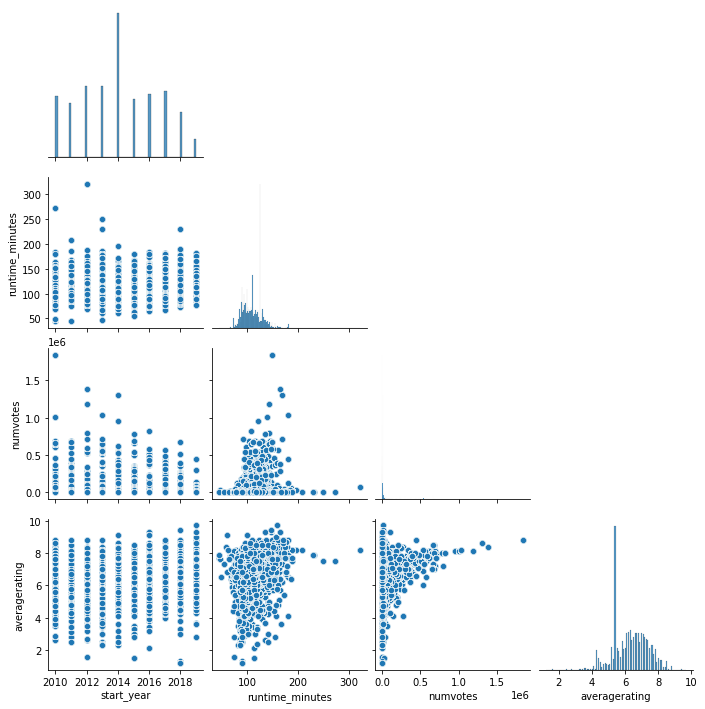

In [131]:
sns.pairplot(imbd_movie_people_sig, corner = True)
plt.show()

In [68]:
imbd_subgroup = imbd_subgroup.drop(imbd_subgroup.columns[[0, 1, 2]],axis = 1)

In [3]:
%%bash

sqlite3 '../zippedData/im.db'
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [4]:
imbd_movie_akas = pd.read_sql("""

SELECT *
FROM movie_akas


""", con)

In [6]:
imbd_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


# TN Movie Budges File as df_tn

In [10]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [12]:
df_tn.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


# df_tmbd Movies File

In [8]:
df_tmbd = pd.read_csv('../zippedData/tmdb.movies.csv')


In [9]:
df_tmbd.head(25)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [15]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [17]:
df_tn.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [68]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv')


In [ ]:
imdb_data = imdb_data.loc[(imdb_data['category'] == 'actress') | (imdb_data['category'] == 'director') | (imdb_data['category'] == 'actor')]
#reassigning the data frame so the rows only have actress, actor and directors

In [ ]:
Imdb_newdata = imdb_data.merge(movie_budgets, how = "inner", left_on = 'title', right_on = 'movie')
#merging the two data frames based on the title and movie columns respectively to create new data frame